# Multi-Layer Perceptron

## Model Specification

Multi-Layer perceptron is a multi-layer generalization of the Rosenblatt’s perceptron. Rosenblatt's perceptron a variant of the McCulloch and Pitt neuron with a provably convergent learning rule, which is similar to gradient descent.

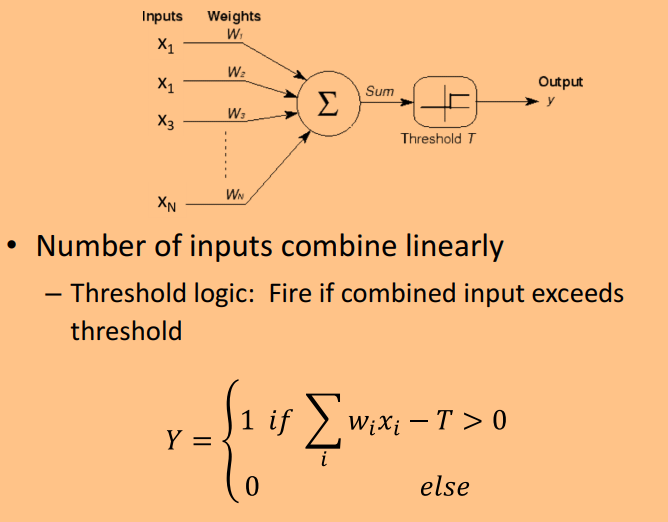

### Variants and Generalizations

* **McCullough and Pitt model**: Neurons as Boolean threshold units
    
    - Models the brain as performing propositional logic
    
    - But no learning rule

* **Hebb’s learning rule**: Neurons that fire together wire together, but it is unstable.
* Modern neural network models are essentially MLPs with different activation functions.
* **ADALINE and MADALINE**
* **Wide and Deep neural net**. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. It connects all or part of the inputs directly to the output layer, as shown in Figure 10-14. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).17 In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

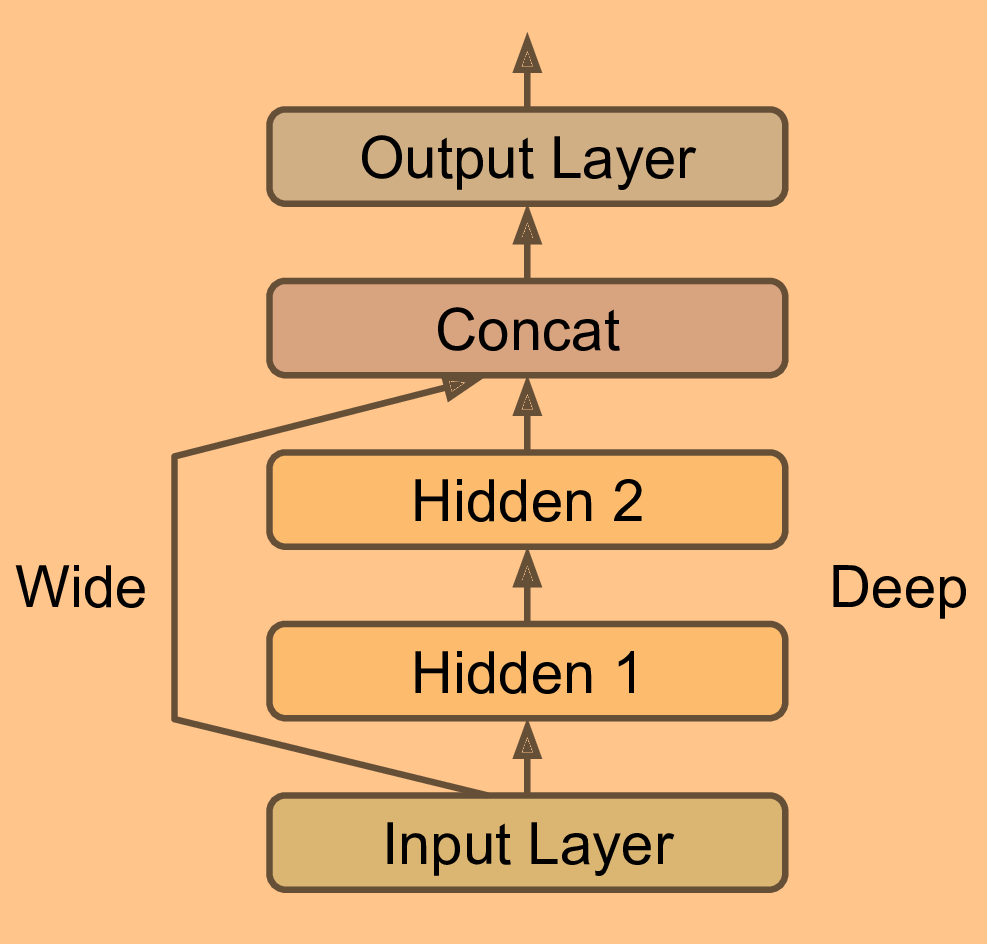

## Theoretical Properties

A bit of history

* Neural networks began as computational models of the brain
* Neural network models are connectionist machines
    - The comprise networks of neural units    
* McCullough and Pitt model: Neurons as Boolean threshold units
    - Models the brain as performing propositional logic
    - But no learning rule
* Hebb’s learning rule: Neurons that fire together wire together
    – Unstable

Rosenblatt's perceptron, or the individual form, can express 'and', 'not' and 'or', but not 'xor' (Minsky and Papert, 1968). But its multi-layer version, or MLP can be shown to be

* able to **model arbitrary boolean function**, with individual perceptron as Boolean gates.
    > Even network with a _single_ hidden layer is a universal Boolean machine, though it may require an exponentially large number of perceptrons. 
    
    > Getting deeper in the network can help reduce network size (number of neurons at each level, sometimes exponentially). But then it is shown that to approximate arbitrary functions, each layer still should have sufficient capacity so that information is not lost in the filtering. 
    
    > This can be somewhat alleviated by using not a threshold activation as defined by perceptron, but other activations such as ReLu or sigmoid to indicate how far the sample point is to the decision boundary, so that information is not lost. This intuition can be carried through in the cases where MLP is used as classifiers or to approximate other functions.
* **universal classifier**, where individual perceptrons as feature detectors, or correlation filters that fires when a pattern is recognized (i.e. have correlation so strong to trigger the activation).
* **universal function approximator**: (probably attributed to Leshno and Schocken (1991), according to MLEDU)
  > It can be shown that this can be done even with just one-layer and infinite neurons. It first construct a 'cylinder' in the high-dimensional space. This is something that probably only have theoretical appeal.

The usual optimization technique for MLP is Stochastic Gradient Descent (SGD). SGD converges “almost surely” to a global or local minimum for most
functions.

 > Sufficient condition: step sizes follow the following conditions: (1) $\sum_k\eta_k=\infty$ so that eventually the entire parameter spce can be searched; (2) $\sum_k\eta_k^2<\infty$, so that the steps shrink.
 > The fastest converging series that satisfies both above requirements is $\eta_k\approx\frac{1}{k}$, which is the optimal rate of shrinking the step size for strongly convex functions.
 > More generally, the learning rates are heuristically determined.

### Advantages and Disadvantages

* Advantages

    - Perceptrons can always train (albeit of an extrmely long time) to separate the classes, as long as the problem is linearly separable.

* Disadvantages

    - Learning networks of threshold-activation perceptrons requires solving a hard combinatorial-optimization problem. Because we cannot compute the influence of small changes to the parameters on the overall error. That is why in modern neural network we use continuous activation functions with non-zero derivatives to enables us to estimate network parameters by running optimizations.
    - This is not necessarily a disadvantage, but perceptrons and MLPs are methods with low bias and high variance: very sensitive to outliers and any one of the training sample point. This is to be contrasted vs. neural networks with other different activation functions. More specifically, for neural network that has differentiable activation that backprop can work, it will often not find a separating solution **even though the solution is within the class of functions learnable by the network**.
    


### Relation to Other Models

#### Different Activations

A special case of modern neural network. The modern neural network typically has **different activation functions**. The various activation functions are devised to deal with the *vanishing gradients* or *exploding gradients* problems in backprop. 

More specifically, in a 2010 paper by Xavier Glorot and Yoshua Bengio. The authors showed that with the sigmoid activation function and this initialization scheme, the variance of the outputs of each layer is much greater than the variance of its inputs. Going forward in the network, the variance keeps increasing after each layer until the activation function saturates at the top layers. This saturation is actually made worse by the fact that the logistic function has a mean of $0.5$, not $0$ (the hyperbolic tangent function has a mean of $0$ and behaves slightly better than the logistic function in deep networks).

| Activation Function | Definition | Neurons dying and saturation for extreme input values, killing gradients | Computationaly Expensive |  Can generate negative output and gradient |
| - | - | - | - | - |
| sigmond | $\frac{1}{1+e^{-x}}$ | yes | relatively yes (exponential functions) | no |
| tanh | $\frac{e^x - e^{-x}}{e^x + e^{-x}}$ |yes | no | yes |
| ReLu | $\max(0, x)$ | yes (the 'dying ReLus') | yes | no |
| Leaky Relu/Prelu (parametric ReLu)| $\max(px, x)$ |no, but doubles the number of parameters | no | yes |
| maxout | $\max(w_1 x + b_1, w_2 x + b_2)$ | no | no | no |
| softplus | (see below) | no | yes | no |
| exponential linear unit (ELU)| (see below) | no | relatively yes (exponential function) | yes | 

 - **Softplus** activation function is like this: $\log(1+\exp(z))$, which is close to $0$ when $z$ is negative and close to $z$ when $z$ is positive.

 - **ELU** activation function is like this: $\alpha(\exp(z)-1)$ if $z<0$ and $z$ if $z\geq0$ (if $\alpha=1$ then it is smooth everywhere, helping the gradient computation).
 
 - There is also a newer version of ELU, called scaled ELU, or **SELU**, which under some somehow strict initialization conditions, can guarantee self-normalization. But unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use L1 or L2 regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions. see Chapter 11 of the Hands-on book and its corresponding notebook for more details.

#### Difference to other classification algos

Contrary to logistic regression, perceptron does not output a class probability.

## Empirical Performance

There is **anecdotal evidence that variance of neural network will decrease with depth**. 

Also, it is a popular hypothesis that 
- In large networks, **saddle points are far more common than local minima**. This is probably because in large networks, there are more parameters and the search space is higher dimensional.
- **Most local minima are equivalent**. In fact, as mentioned above, number of neurons/number of layers increase model capacity, as well as the risk of over-fitting. But it is a bad idea to prevent over-fitting by restricting the number of neurons/layers, since local minimas of smaller networks tend to have larger losses than bigger networks. It is better to use other regularization methods, such as L1/L2, or dropouts.
- Those are not true for small networks.

### Advantages and Disadvantages

## Implementation Details and Practical Tricks



 - See the various optimization techniques and tricks in [efficient-deep-learning-and-optimization.ipynb](../meta-learning/efficient-deep-learning-and-optimization.ipynb).
 
 `scikit-Learn`’s Perceptron class is equivalent to using an `SGDClassifier` with the following hyperparameters: `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` (the learning rate), and `penalty=None` (no regularization).

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

Or it can be done via `keras`. Here is an example of MLP using the *declarative* approach. You can either use the sequential API or the functional API for this (in the example below we just show using the sequential API). There is also a more *imperative* approach; see [efficient_deep_learning_and_optimization.ipynb](efficient_deep_learning_and_optimization.ipynb).  

Specifying `activation="relu"` is equivalent to specifying `activation=keras.activations.relu`. Other activation functions are available in the `keras.activations` package, including `relu`, `elu`, `selu` (some of these have extra input arguments to specify); see https://keras.io/activations/ for the full list. Code examples documented on *keras.io* will work fine with `tf.keras`, but you need to change the imports

In [2]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Note that `input_shape` is an attribute of the base class `keras.layers` and thus inherented by various different layers. It is a tuple of integers, **not including the batch size**. For instance, `shape=(28, 28)` indicates that the expected input will be batches of $28\times 28$ matrices. Elements of this tuple can be None; `None` elements represent dimensions where the shape is not known.

If you find yourself defining a model with layers that share a lot of attributes in common, consider using the `functools.partial()` module.

In [3]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax",
                     kernel_initializer="glorot_uniform")
])

The model’s `summary()` method displays all the model’s layers,14 including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (`None` means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters.

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Visualization of the model

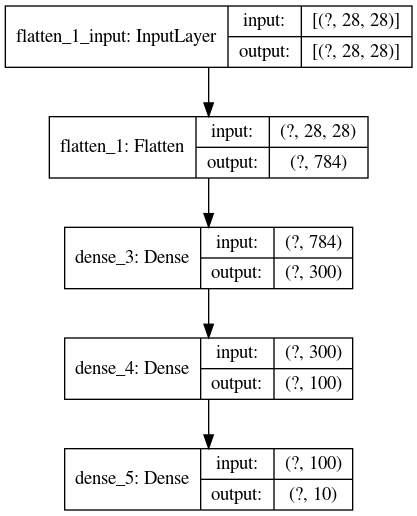

In [5]:
import pydot
import graphviz
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation. We will use many other losses, optimizers, and metrics in this book; for the full lists, see https://keras.io/losses, https://keras.io/optimizers, and https://keras.io/metrics. It has most of the usual ones available by specifying the string, e.g. 'sparse_categorical_crossentropy' or 'accuracy' below. Note that as of the time of writing (May 2021), `keras` does not have LBFGS as an optimizer readily available, which is available in sklearn's [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) and also in pytorch. This is a shame, since methods using Hessian matrix seems more efficient for simple connected MLPs.

A tip is that if you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the `keras.utils.to_categorical()` function. To go the other way round, use the np.argmax() function with axis=1.

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.001), # if we do not set it, by default it is 0.01
              metrics=["accuracy"])

Now we can pass the data and train the model. Instead of passing a validation set using the `validation_data` argument as below, you could set `validation_split` to the ratio of the training set that you want Keras to use for validation. For example, `validation_split=0.1` tells Keras to use the last 10% of the data (before shuffling) for validation.

In [7]:
# We use the fashion MNIST data as an example. More introduction can be found in the Hands-On book Chapter 10.
# If you have ssl issues, see the last answer in https://stackoverflow.com/questions/52805115/certificate-verify-failed-unable-to-get-local-issuer-certificate
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255. # Note that you need to apply the same scaling to your testing data

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)) # passing of validation set is optional

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 91us/sample - loss: 9.1033 - accuracy: 0.6372 - val_loss: 8.4955 - val_accuracy: 0.7430
Epoch 2/30
55000/55000 [==============================] - 3s 56us/sample - loss: 8.1957 - accuracy: 0.7609 - val_loss: 7.8866 - val_accuracy: 0.7820
Epoch 3/30
55000/55000 [==============================] - 3s 55us/sample - loss: 7.6425 - accuracy: 0.7854 - val_loss: 7.3765 - val_accuracy: 0.8032
Epoch 4/30
55000/55000 [==============================] - 3s 54us/sample - loss: 7.1603 - accuracy: 0.7986 - val_loss: 6.9203 - val_accuracy: 0.8094
Epoch 5/30
55000/55000 [==============================] - 3s 55us/sample - loss: 6.7225 - accuracy: 0.8068 - val_loss: 6.5017 - val_accuracy: 0.8182
Epoch 6/30
55000/55000 [==============================] - 3s 54us/sample - loss: 6.3206 - accuracy: 0.8124 - val_loss: 6.1163 - val_accuracy: 0.8216
Epoch 7/30
55000/55000 [==============================] -

The `fit()` method returns a `History` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). 

If you use the above dictionary to create a `pandas` DataFrame and call its `plot()` method, you get the learning curves. One tip in plotting (or just simply viewing) the training curves: the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left w.r.t the validation curve; see Chap 10 of [<Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow>](https://www.evernote.com/shard/s191/nl/21353936/e4e0f85e-357a-444d-b1a0-ec9cabd008cb?title=Hands-On%20Machine%20Learning%20with%20Scikit-Learn,%20Keras,%20and%20Tensorflow,%202nd%20Edition) for an example.

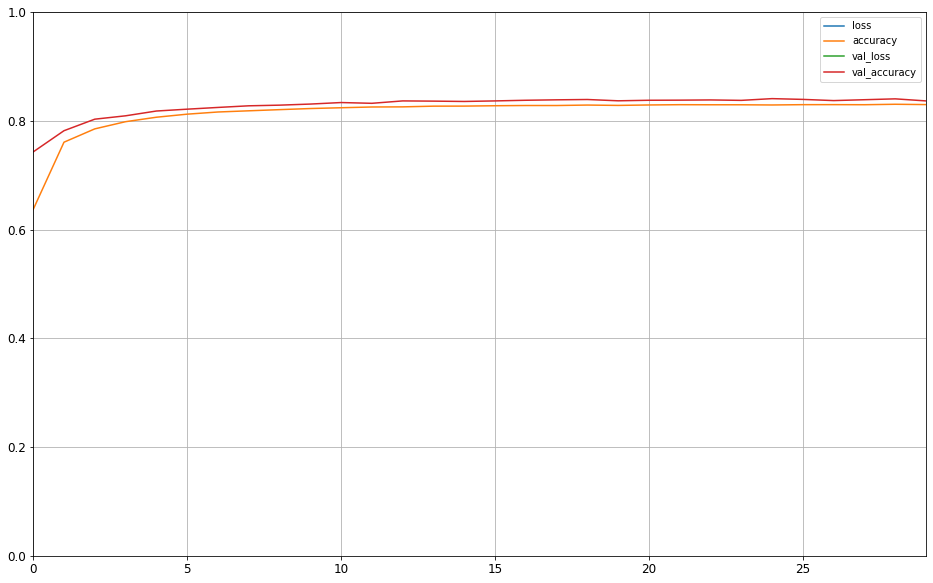

In [8]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

pd.DataFrame(history.history).plot(figsize=(16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Now evaluate on the test set and also do prediction/inference.

In [9]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.8881376134872436, 0.8187]

In [10]:
X_new = X_test[:3]
y_proba = model.predict(X_new) # note that predict gives you the class prob; there is another predict_class that gives you the predicted class.
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.28, 0.04, 0.47],
       [0.  , 0.  , 0.84, 0.  , 0.04, 0.  , 0.11, 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

When using the sequential or functional API of `keras`, you will also be able to save and load models

In [11]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")

## Use Cases

## Results Interpretation, Metrics and Visualization

## References

- CMU Deep Learning Course Fall 2019.
- Stanford 231n
- [<Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow>](https://www.evernote.com/shard/s191/nl/21353936/e4e0f85e-357a-444d-b1a0-ec9cabd008cb?title=Hands-On%20Machine%20Learning%20with%20Scikit-Learn,%20Keras,%20and%20Tensorflow,%202nd%20Edition), 2nd Edition. Chapter 10.
- MLEDU

### Further Reading

- CMU Deep Learning Course Fall 2019, Lecture 3 about ADALINE and MADALINE
- Heng-Tze Cheng et al., “Wide & Deep Learning for Recommender Systems,” Proceedings of the First Workshop on Deep Learning for Recommender Systems (2016): 7–10.


## Misc.